In [ ]:
!pip install yfinance numpy pandas matplotlib hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from datetime import datetime



[*********************100%***********************]  1 of 1 completed
<ipython-input-5-7a7f4a85e293>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Hidden State'] = hidden_states


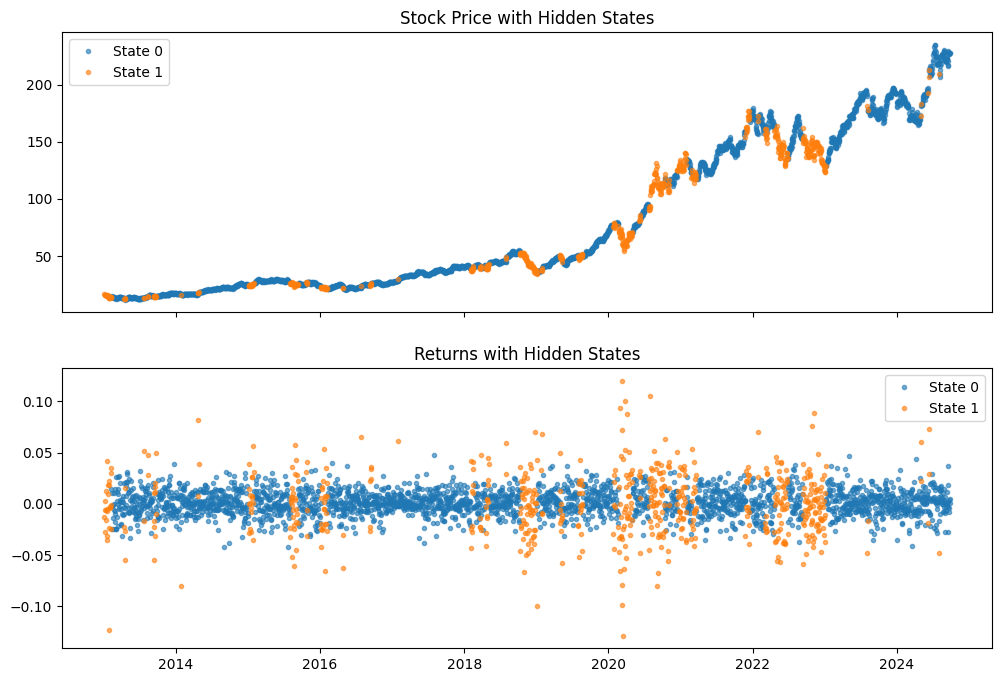

Transition matrix between hidden states:
[[0.96118271 0.03881729]
 [0.12917252 0.87082748]]

Means and Variances of hidden states:
Hidden State 0:
Mean = 0.0014538605151655573
Variance = 0.0001443695345085404

Hidden State 1:
Mean = -0.0003140868132466177
Variance = 0.000898429833154406



In [ ]:
# Part 1: Data Collection and Preprocessing
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()
    return stock_data.dropna()

# Part 2: Fitting the Gaussian Hidden Markov Model
def fit_hmm_model(returns, num_states=2):
    # Reshaping returns to be a 2D array as hmmlearn requires
    returns_reshaped = returns.reshape(-1, 1)

    # Gaussian HMM
    model = GaussianHMM(n_components=num_states, covariance_type='diag', n_iter=1000)
    model.fit(returns_reshaped)

    # Predict hidden states
    hidden_states = model.predict(returns_reshaped)

    return model, hidden_states

# Part 3: Visualization of Hidden States
def plot_hidden_states(stock_data, hidden_states, num_states):
    fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)

    stock_data['Hidden State'] = hidden_states

    # Plot stock price with hidden state coloring
    for state in range(num_states):
        idx = stock_data['Hidden State'] == state
        ax[0].plot(stock_data.index[idx], stock_data['Adj Close'][idx], '.', label=f"State {state}", alpha=0.6)

    ax[0].set_title('Stock Price with Hidden States')
    ax[0].legend()

    # Plot returns with hidden state coloring
    for state in range(num_states):
        idx = stock_data['Hidden State'] == state
        ax[1].plot(stock_data.index[idx], stock_data['Returns'][idx], '.', label=f"State {state}", alpha=0.6)

    ax[1].set_title('Returns with Hidden States')
    ax[1].legend()

    plt.show()

# Part 4: Transition Matrix and State Interpretation
def print_model_details(model, num_states):
    # Transition matrix
    print("Transition matrix between hidden states:")
    print(model.transmat_)

    # Mean and variance for each hidden state
    print("\nMeans and Variances of hidden states:")
    for i in range(num_states):
        print(f"Hidden State {i}:")
        print(f"Mean = {model.means_[i][0]}")
        print(f"Variance = {np.diag(model.covars_[i])[0]}")
        print()

# Main execution
if __name__ == '__main__':
    ticker = "AAPL"
    start_date = "2013-01-01"
    end_date = datetime.today().strftime('%Y-%m-%d')
    stock_data = get_stock_data(ticker, start_date, end_date)
    model, hidden_states = fit_hmm_model(stock_data['Returns'].values, num_states=2)
    plot_hidden_states(stock_data, hidden_states, num_states=2)
    print_model_details(model, num_states=2)

In [ ]:


# Part 1: Data Collection and Preprocessing
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()
    return stock_data.dropna()

# Part 2: Fitting the Gaussian Hidden Markov Model
def fit_hmm_model(returns, num_states=4):
    # Reshaping returns to be a 2D array as hmmlearn requires
    returns_reshaped = returns.reshape(-1, 1)

    # Gaussian HMM
    model = GaussianHMM(n_components=num_states, covariance_type='diag', n_iter=1000)
    model.fit(returns_reshaped)

    # Predict hidden states
    hidden_states = model.predict(returns_reshaped)

    return model, hidden_states


[*********************100%***********************]  1 of 1 completed
<ipython-input-7-557ebad32ba8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Hidden State'] = hidden_states


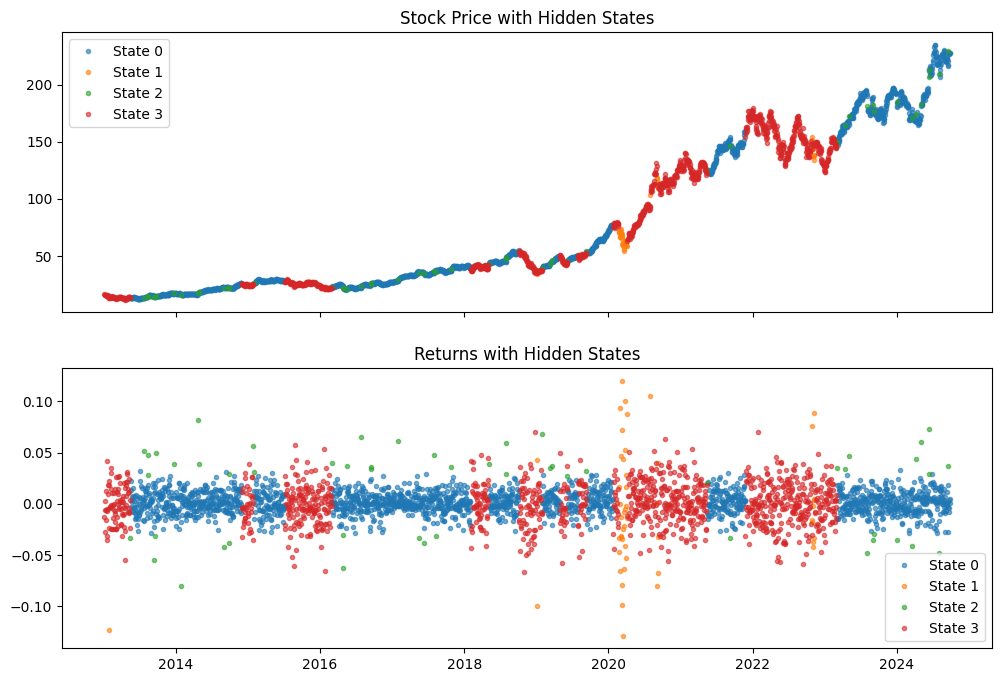

Transition matrix between hidden states:
[[9.32615490e-01 6.17124715e-14 5.92885506e-02 8.09595963e-03]
 [1.49346056e-07 8.54064033e-01 8.32800816e-08 1.45935734e-01]
 [7.72370488e-01 1.95108093e-11 2.27167046e-01 4.62465323e-04]
 [4.80920152e-03 1.17034725e-02 1.17154721e-02 9.71771854e-01]]

Means and Variances of hidden states:
Hidden State 0:
Mean = 0.0015133976140299101
Variance = 0.00011692858199185083

Hidden State 1:
Mean = -0.0036439146224800565
Variance = 0.0027383388272657215

Hidden State 2:
Mean = 0.004729825383955911
Variance = 0.0009387857537448697

Hidden State 3:
Mean = -7.4871477413909e-05
Variance = 0.00043071869627884417



In [ ]:

# Part 3: Visualization of Hidden States
def plot_hidden_states(stock_data, hidden_states, num_states):
    fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)

    stock_data['Hidden State'] = hidden_states

    # Plot stock price with hidden state coloring
    for state in range(num_states):
        idx = stock_data['Hidden State'] == state
        ax[0].plot(stock_data.index[idx], stock_data['Adj Close'][idx], '.', label=f"State {state}", alpha=0.6)

    ax[0].set_title('Stock Price with Hidden States')
    ax[0].legend()

    # Plot returns with hidden state coloring
    for state in range(num_states):
        idx = stock_data['Hidden State'] == state
        ax[1].plot(stock_data.index[idx], stock_data['Returns'][idx], '.', label=f"State {state}", alpha=0.6)

    ax[1].set_title('Returns with Hidden States')
    ax[1].legend()

    plt.show()

# Part 4: Transition Matrix and State Interpretation
def print_model_details(model, num_states):
    # Transition matrix
    print("Transition matrix between hidden states:")
    print(model.transmat_)

    # Mean and variance for each hidden state
    print("\nMeans and Variances of hidden states:")
    for i in range(num_states):
        print(f"Hidden State {i}:")
        print(f"Mean = {model.means_[i][0]}")
        print(f"Variance = {np.diag(model.covars_[i])[0]}")
        print()

# Main execution
if __name__ == '__main__':
    ticker = "AAPL"
    start_date = "2013-01-01"
    end_date = datetime.today().strftime('%Y-%m-%d')
    stock_data = get_stock_data(ticker, start_date, end_date)
    model, hidden_states = fit_hmm_model(stock_data['Returns'].values, num_states=4)
    plot_hidden_states(stock_data, hidden_states, num_states=4)
    print_model_details(model, num_states=4)
